## Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

**1. Crosstab Analysis:**

- Create a crosstab between the product category and the isBestSeller status.
- Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [26]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [48]:
cbt = pd.crosstab(df["category"],df['isBestSeller'])
cbt['Proportion'] = (cbt[True] / cbt[False]) # proportion of bestsellers for each category (unnormalized)
cbt['Proportion'] = cbt['Proportion'] / cbt['Proportion'].sum()
cbt

isBestSeller,False,True,Proportion
category,,,
3D Printers,247,1,0.002177
3D Printing & Scanning,4065,2,0.000265
Abrasive & Finishing Products,245,5,0.010972
Action Cameras,1696,1,0.000317
Adapters,251,3,0.006426
...,...,...,...
Wind Instruments,243,7,0.015487
Window Treatments,234,5,0.011488
Women,17559,213,0.006522


In [49]:
cbt['Proportion'].sum() # check whether the sum equals 1

1.0

In [50]:
top_categories = cbt["Proportion"].sort_values(ascending=False).head(10)
print(top_categories)

category
Grocery                           0.033184
Smart Home Security & Lighting    0.032917
Health & Personal Care            0.032913
Mobile Phone Accessories          0.023847
Power & Hand Tools                0.019696
Billiard, Snooker & Pool          0.017847
Pet Supplies                      0.016742
Home Brewing & Wine Making        0.015747
Wind Instruments                  0.015487
Mirrors                           0.015487
Name: Proportion, dtype: float64


Products from the categories groceries, smart home security & lighting, health & personal care, mobile phone accessoires, and power & hand tools are more prevalent to be bestsellers than others.

**2. Statistical Tests:**

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
- Compute Cramér's V to understand the strength of association between best-seller status and category.

In [5]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(cbt)
chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [6]:
from scipy.stats.contingency import association
association(cbt, method = "cramer")

0.1222829439760564

The p-value and Cramer's value suggest that there is just a very week correlation between the category and bestseller columns.

**3. Visualizations:**

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

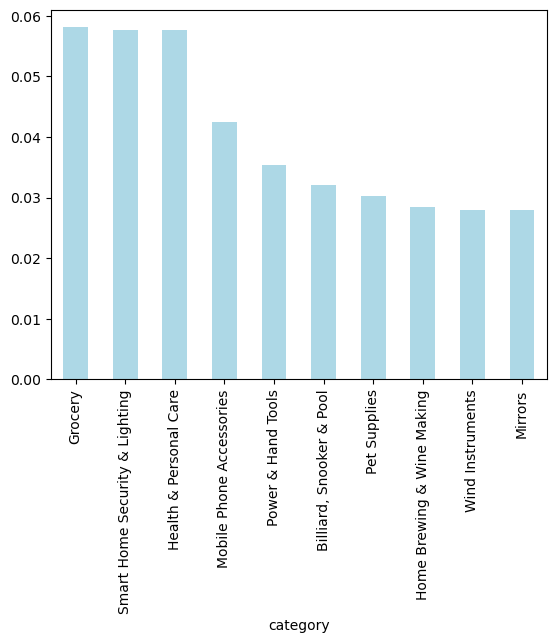

In [7]:
top_categories.plot(kind = "bar", color = 'lightblue');

## Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**1. Measures of Centrality:**

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [8]:
df['price'].mean() # mean price

89.24380943923663

In [9]:
df['price'].median() # median price

19.09

In [8]:
df['price'].mode()[0] # most common price

9.99

The average price of products is way higher than the mode since just some high prices increase the average quiet a lot.

**2. Measures of Dispersion:**

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [11]:
df['price'].var() # variance of price

119445.48532256528

In [12]:
df['price'].std() # standard deviation of price

345.60886175352226

In [20]:
df['price'].min()

0.0

In [13]:
df['price'].max() - df['price'].min() # price range

100000.0

In [14]:
df['price'].quantile(0.75) - df['price'].quantile(0.25) # Interquartile price range

36.0

The standard deviation of the price is extremely high. This is an indicator for a significant spread. The range of prices is 100,000, which partly explains the way higher average than median and mode.

**3. Visualizations:**

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

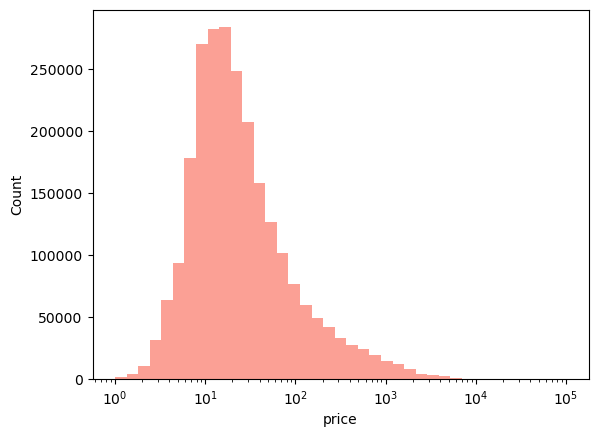

In [27]:
bins = np.logspace(np.log10(1e0), np.log10(df['price'].max()), num = 40)
sns.histplot(df['price'], kde = False, bins = bins, color = "salmon");
plt.xscale('log')

Values spanning over several magnitudes must be plotted on logarithmic axes, then there are no problems when plotting

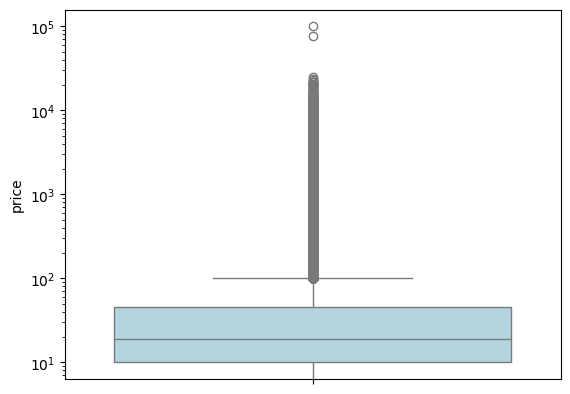

In [16]:
sns.boxplot(data = df['price'], color = 'lightblue');
plt.yscale('log')

Many upper outliers in the box plot show that there are many products that are significantly higher priced by a lot of upper outliers. The IQR lies between 10 and 60$.

## Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**1. Measures of Centrality:**

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products?

In [32]:
df['stars'].unique()

array([4.7, 4.6, 4.5, 4.8, 0. , 4.4, 4.3, 4.1, 4.9, 5. , 3.8, 3.6, 4. ,
       4.2, 3. , 3.9, 2.5, 3.4, 3.7, 3.2, 3.3, 3.5, 2.7, 2.1, 1. , 3.1,
       2. , 2.9, 2.8, 1.5, 2.2, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [46]:
df['stars'].value_counts().sort_index(ascending = True).head(10)

stars
0.0    1225641
1.0       8484
1.1          3
1.2         23
1.3         78
1.4        149
1.5        404
1.6        147
1.7        177
1.8        249
Name: count, dtype: int64

In [28]:
df['stars'].mean() # mean product rating

2.152836472966065

In [29]:
df['stars'].median() # median product rating

0.0

In [30]:
df['stars'].mode()[0] # most common product rating

0    0.0
Name: stars, dtype: float64

The average product rating is 2.2. Way more than half of the ratings are zero stars, therefore the median and the mode are 0. There are products with up to 4.7 stars.

**2. Measures of Dispersion:**

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [47]:
df['stars'].var()

4.81743402976196

In [48]:
df['stars'].std()

2.1948653785054697

In [49]:
df['stars'].quantile(0.75) - df['stars'].quantile(0.25) # Interquartile stars range

4.4

There is a relatively wide range for product ratings, indicated by the standard deviation and big interquartile range. 

**3. Shape of the Distribution:**

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [51]:
print(df['stars'].skew())
print(df['stars'].kurtosis())

0.08120735761080985
-1.9260061280432985


The skewness very close to zero indicates a highly symmetric distribution. The kurtosis << 3 suggests that the tails are lighter and the peak is way heavier than for a normal distribution.

**4. Visualizations:**

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

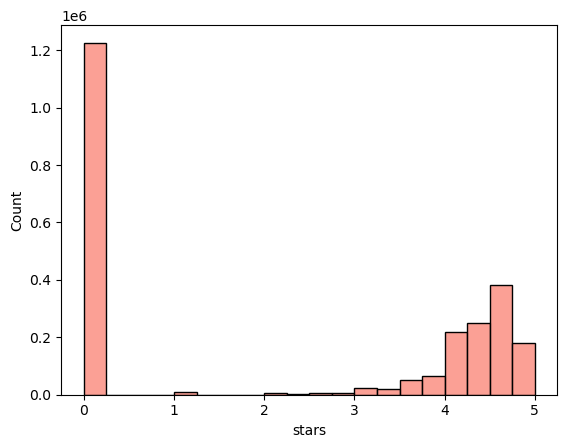

In [53]:
sns.histplot(df['stars'], bins = 20, color = "salmon");

The most common rating is the zero star one. For non zero ratings, most products are rated between 4 and 5 stars.